Epoch 1/5
60000/60000 [==============================] - 32s 540us/step - loss: 0.4673 - acc: 0.83090s - loss: 0.4689 - acc:
Epoch 2/5
60000/60000 [==============================] - 32s 538us/step - loss: 0.3167 - acc: 0.8869
Epoch 3/5
60000/60000 [==============================] - 33s 542us/step - loss: 0.2762 - acc: 0.9001
Epoch 4/5
60000/60000 [==============================] - 33s 543us/step - loss: 0.2511 - acc: 0.90864s - lo
Epoch 5/5
10000/10000 [==============================] - 2s 209us/step
Test loss 0.2632779253363609
Test accuracy 0.9047
[[861   3  22   8   6   1  95   0   4   0]
 [  3 983   0  12   1   0   1   0   0   0]
 [ 14   2 851   8  52   0  73   0   0   0]
 [ 25  10  10 901  20   0  34   0   0   0]
 [  1   1  28  35 880   1  53   0   1   0]
 [  0   0   0   0   0 976   0  14   1   9]
 [134   2  61  21  78   0 699   0   5   0]
 [  0   0   0   0   0  14   0 963   0  23]
 [  2   1   6   3   4   3   9   3 969   0]
 [  0   0   0   0   0   4   1  31   0 964]]
             

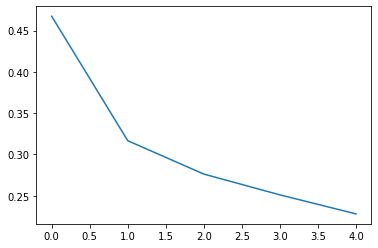

In [16]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

(X_train,Y_train), (X_test,Y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(-1, 28,28, 1)
X_test = X_test.reshape(-1, 28,28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

Y_train_t_h = to_categorical(Y_train)
Y_test_t_h = to_categorical(Y_test)

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = model.fit(X_train, Y_train_t_h, batch_size=64, epochs=5)

plt.plot(history.history['loss'])

test_loss, test_acc = model.evaluate(X_test, Y_test_t_h)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

test_predictions = model.predict_classes(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_true = Y_test, y_pred = test_predictions)
print(confusion_matrix)
print(classification_report(y_true = Y_test, y_pred = test_predictions))  